In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set it to your desired number of threads
import missingno as msno
import csv

from IPython.display import display #To display dataframe with a nice format.

# Setting display precision for pandas
pd.set_option("display.precision", 2)
# Set display option to show all columns
pd.set_option('display.max_columns', None)

blue_green      = (82/255, 162/255, 160/255)
blue_green_dark = (41/255, 81/255, 81/255)

# ==================================================================================================
# Set the fontsize & Bold for each GRAPH !!!
# ==================================================================================================
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.titlepad'] = 20 

In [2]:
# ==================================================================================================
# READ DATA
# ==================================================================================================


# Define the URL of your GitHub CSV file
url_df_data = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET8\flipkart_com-ecommerce_sample_1050.csv"
df_data = pd.read_csv(url_df_data)

print("Datasets loaded succesfully ! :D")

Datasets loaded succesfully ! :D


In [3]:
display(df_data.sample(10))

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
960,9c41f67773da27940d77460715e880be,2016-03-18 08:01:41 +0000,http://www.flipkart.com/cotonex-beige-cotton-k...,Cotonex Beige Cotton Kitchen Linen Set,"[""Home Furnishing >> Kitchen & Dining Linen >>...",KLSEGUBYAPFVGGWK,350.0,299.0,9c41f67773da27940d77460715e880be.jpg,False,Cotonex Beige Cotton Kitchen Linen Set (Pack o...,No rating available,No rating available,Cotonex,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
130,f01ff0a82401117e9da22dd680fd2f36,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-old-art-cer...,Rockmantra Old Art Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantr...",MUGEAGGKCDCUHPYQ,499.0,199.0,f01ff0a82401117e9da22dd680fd2f36.jpg,False,Rockmantra Old Art Ceramic Mug (5.5 l)\r\n ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
980,27b7851ae3dfc2ae8c1958cebe93bf0b,2016-04-01 10:31:02 +0000,http://www.flipkart.com/fs-mini-klub-printed-b...,Fs Mini Klub Printed Baby Boy's Round Neck T-S...,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",TSHEH9F3JXP2EVRG,399.0,399.0,27b7851ae3dfc2ae8c1958cebe93bf0b.jpg,False,Specifications of Fs Mini Klub Printed Baby Bo...,No rating available,No rating available,Fs Mini Klub,"{""product_specification""=>[{""key""=>""Sleeve"", ""..."
891,463492671c5c19316a0fb9fe1c53da48,2015-12-20 08:26:17 +0000,http://www.flipkart.com/lukluck-cotton-bath-to...,LukLuck Cotton Bath Towel,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWECDBWTUETCFCK,1299.0,599.0,463492671c5c19316a0fb9fe1c53da48.jpg,False,"LukLuck Cotton Bath Towel (Bath Towel, Multico...",5,5,LukLuck,"{""product_specification""=>[{""key""=>""Machine Wa..."
642,4d638f7a608a76db27cd7bab13582a93,2016-02-28 10:36:58 +0000,http://www.flipkart.com/next-steps-baby-girl-s...,next steps Baby Girl's Striped Top & Pyjama Set,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",NSTEG48NRGZZSGUH,529.0,309.0,4d638f7a608a76db27cd7bab13582a93.jpg,False,Specifications of next steps Baby Girl's Strip...,No rating available,No rating available,next steps,"{""product_specification""=>[{""key""=>""Pattern"", ..."
52,f01140c02fd09e5c56312a64fa8db3da,2016-05-30 10:52:06 +0000,http://www.flipkart.com/cookart-elegant-s-s-ha...,Cookart Elegant S.S. Handi With Hot Pot Pack o...,"[""Kitchen & Dining >> Cookware >> Casserole & ...",CRLEJ6B76SJP8ZVG,945.0,699.0,f01140c02fd09e5c56312a64fa8db3da.jpg,False,Key Features of Cookart Elegant S.S. Handi Wit...,No rating available,No rating available,Cookart,"{""product_specification""=>[{""key""=>""Microwave ..."
964,06b8da0c6a24b91c8020f8b1c78d04c3,2016-03-18 08:01:41 +0000,http://www.flipkart.com/furnishingland-maroon-...,FURNISHINGLAND Maroon Silk Carpet,"[""Home Furnishing >> Floor Coverings >> Carpet...",CPGEGUDZKSTV74GH,14798.0,7399.0,06b8da0c6a24b91c8020f8b1c78d04c3.jpg,False,Key Features of FURNISHINGLAND Maroon Silk Car...,No rating available,No rating available,FURNISHINGLAND,"{""product_specification""=>[{""key""=>""Shape"", ""v..."
959,f622e6c12de2c6534c94635f671af107,2016-03-18 08:01:41 +0000,http://www.flipkart.com/gims-brown-viscose-car...,GIMS Brown Viscose Carpet,"[""Home Furnishing >> Floor Coverings >> Carpet...",CPGEFRFPF5ZPTKF5,4800.0,4100.0,f622e6c12de2c6534c94635f671af107.jpg,False,Key Features of GIMS Brown Viscose Carpet soft...,No rating available,No rating available,GIMS,"{""product_specification""=>[{""key""=>""Shape"", ""v..."
860,6136976dc5a433cdf8e2559b8510bdce,2015-12-29 05:07:38 +0000,http://www.flipkart.com/dizionario-mini-perfum...,Dizionario Mini Perfume Fan Cooling Fancoolerb...,"[""Computers >> Laptop Accessories >> USB Gadge...",USGEBYYPVTTJA9JR,1199.0,799.0,6136976dc5a433cdf8e2559b8510bdce.jpg,False,Buy Dizionario Mini Perfume Fan Cooling Fancoo...,No rating available,No r

# 0.2. Valeurs Manquantes ou dupliquées

In [4]:
df_data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [5]:
# Remove rows where 'product_specifications' is null
print("Nombre de lignes avant la suppression :", df_data.shape[0])
df_data = df_data.dropna(subset=['product_specifications'])
print("Nombre de lignes après la suppression :", df_data.shape[0])
df_data.reset_index(drop=True, inplace=True)

Nombre de lignes avant la suppression : 1050
Nombre de lignes après la suppression : 1049


<Axes: >

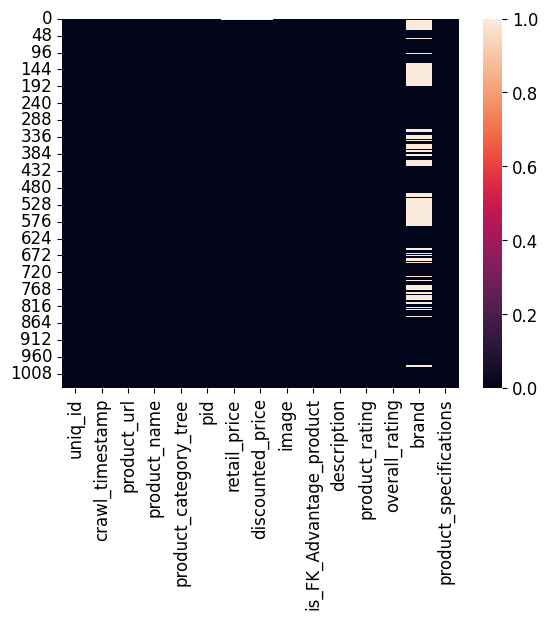

In [6]:
sns.heatmap(df_data.isna())

In [7]:
df_data.duplicated().sum()


0

In [8]:
for col in df_data.columns:
    n=df_data.duplicated(subset=col).sum()
    print(f"col: {col} -> duplicated : {n}")

col: uniq_id -> duplicated : 0
col: crawl_timestamp -> duplicated : 901
col: product_url -> duplicated : 0
col: product_name -> duplicated : 0
col: product_category_tree -> duplicated : 408
col: pid -> duplicated : 0
col: retail_price -> duplicated : 694
col: discounted_price -> duplicated : 624
col: image -> duplicated : 0
col: is_FK_Advantage_product -> duplicated : 1047
col: description -> duplicated : 0
col: product_rating -> duplicated : 1022
col: overall_rating -> duplicated : 1022
col: brand -> duplicated : 559
col: product_specifications -> duplicated : 65


# 0.3. Feature Engineering

## O.3.1. CATEGORIES - TOP, SECONDARY, TERTIARY

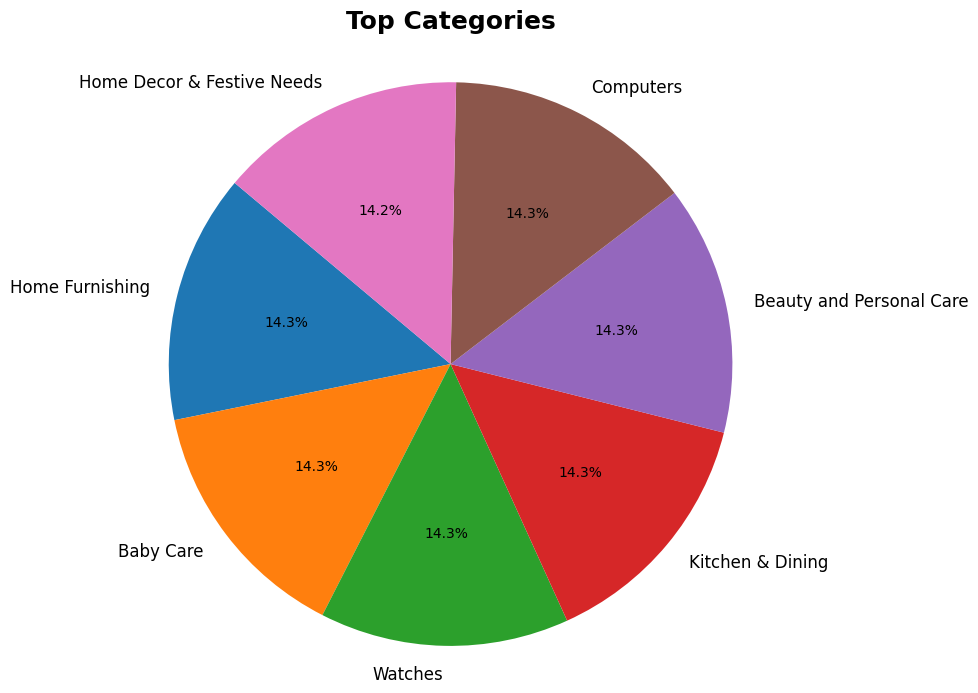

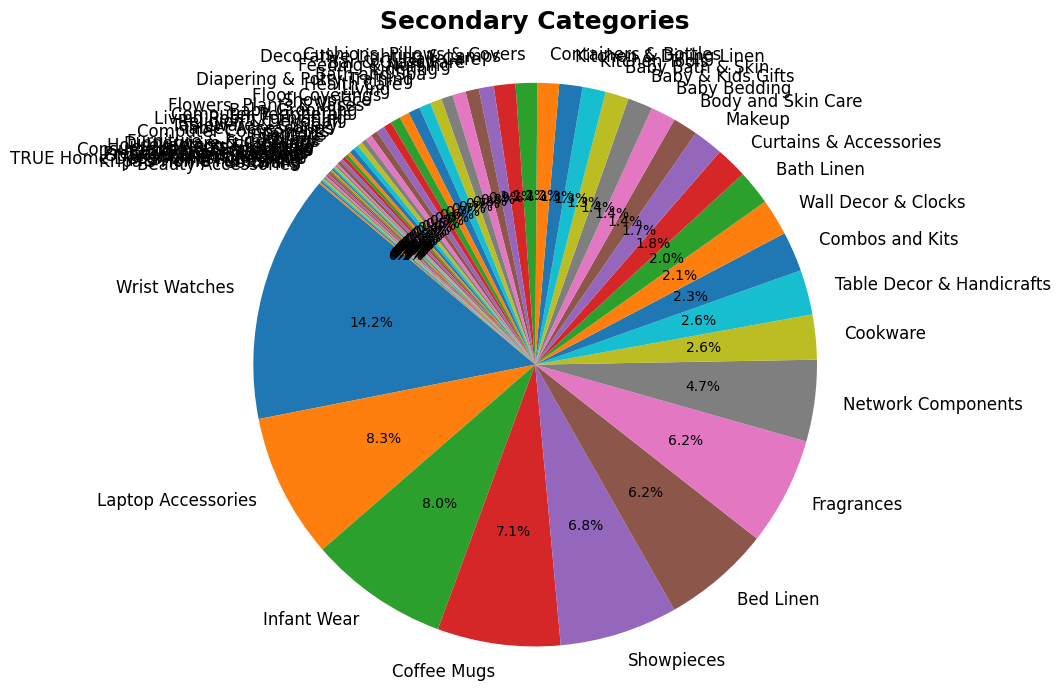

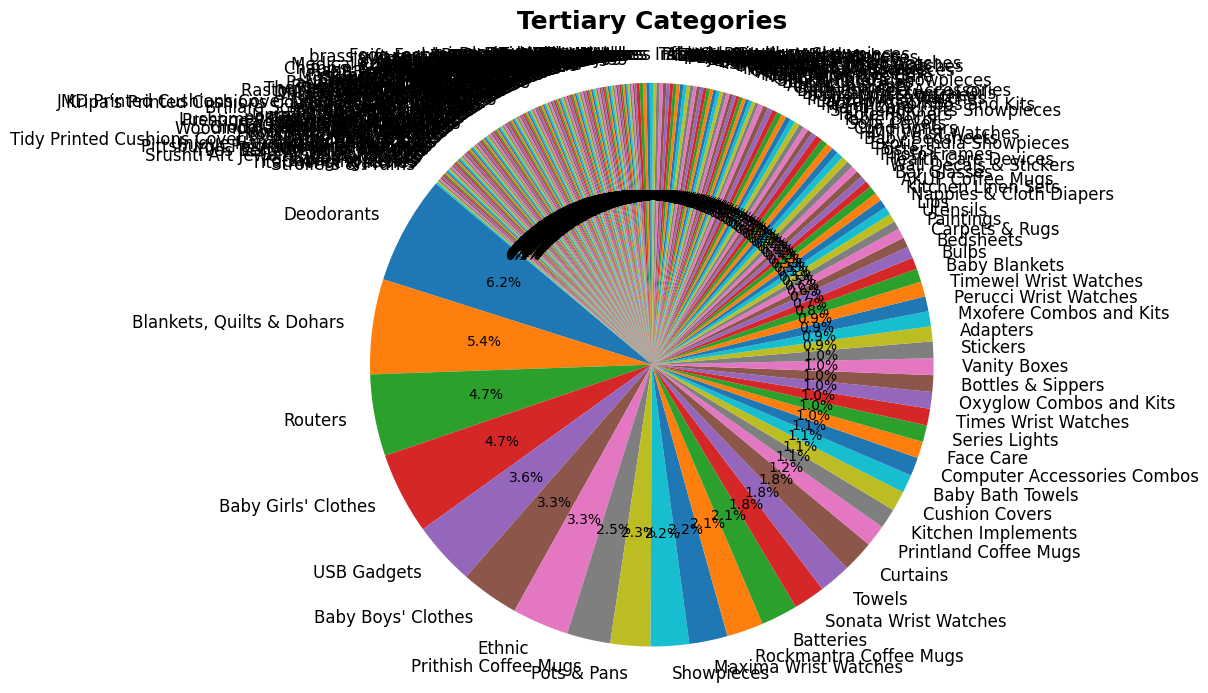

Number of unique top categories: 7
Number of unique secondary categories: 62
Number of unique tertiary categories: 240


In [9]:
# ==================================================================================================
# TOP, SECONDARY and TERTIARY CATEGORIES
# ==================================================================================================
# Function to extract top, secondary, and tertiary categories
def extract_categories(category_tree):
    # Split the category tree string and get categories
    categories = category_tree.strip('[]').split(">>")
    
    # Extract top category
    top_category = categories[0].strip().replace('"', '')
    
    # Extract secondary category if available
    secondary_category = categories[1].strip().replace('"', '') if len(categories) > 1 else None
    
    # Extract tertiary category if available
    tertiary_category = categories[2].strip().replace('"', '') if len(categories) > 2 else None
    
    return top_category, secondary_category, tertiary_category

# Apply the function to each row in the DataFrame
df_data['top_category'], df_data['secondary_category'], df_data['tertiary_category'] = zip(*df_data['product_category_tree'].apply(extract_categories))

# Extract unique categories
unique_top_categories = df_data['top_category'].unique()
unique_secondary_categories = df_data['secondary_category'].unique()
unique_tertiary_categories = df_data['tertiary_category'].unique()

# Function to plot pie chart for category distribution
def plot_category_pie_chart(categories, title):
    # Count the frequency of each category
    category_counts = categories.value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Plot pie chart for top categories
plot_category_pie_chart(df_data['top_category'], 'Top Categories')

# Plot pie chart for secondary categories
plot_category_pie_chart(df_data['secondary_category'], 'Secondary Categories')

# Plot pie chart for tertiary categories
plot_category_pie_chart(df_data['tertiary_category'], 'Tertiary Categories')



# ==================================================================================================
# COUNT NUMBER OF CATEGORY IN TOP, SECONDARY and TERTIARY
# ==================================================================================================
# Extract unique categories
nunique_top_categories = df_data['top_category'].nunique()
nunique_secondary_categories = df_data['secondary_category'].nunique()
nunique_tertiary_categories = df_data['tertiary_category'].nunique()

print("Number of unique top categories:", nunique_top_categories)
print("Number of unique secondary categories:", nunique_secondary_categories)
print("Number of unique tertiary categories:", nunique_tertiary_categories)

In [10]:
# IMPTUE TERTIARY CATEGORY
df_data['tertiary_category'].fillna("NO TERTIARY CATEGORY", inplace=True)

C:\Users\Olivi\AppData\Local\Temp\ipykernel_196\2735862575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['tertiary_category'].fillna("NO TERTIARY CATEGORY", inplace=True)


# I. Etudier la faisabilité de classification en utilisant des méthodes NLP basiques

## I.1. Prétraitement de textes (nettoyage, stemming et lemmatization)

In [11]:
# Set pandas display options to show more characters per column
pd.set_option('display.max_colwidth', None)

In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

# ==================================================================================================
# PRE-TREATMENT OF THE DESCRIPTION TEXT : CLEANING, STEMMING and LEMMATIZATION. 
# ==================================================================================================
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove punctuation and symbols using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Eliminate tokens with less than 4 letters
    tokens = [word for word in tokens if len(word) >= 3]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# ==================================================================================================
# EXEMPLE D APPLICATION 
# ==================================================================================================
# Example English sentence
example_sentence = "We have been gratified by the popularity of the first edition of The Elements of Statistical Learning. This, along with the fast pace of research in the statistical learning field, motivated us to update our book with a second edition. We have added four new chapters and updated some of the existing chapters. Because many readers are familiar with the layout of the first edition, we have tried to change it as little as possible. Here is a summary of the main changes:"
# example_sentence = "The quick brown fox jumps over the lazy dog."

# Preprocess the example sentence
clean_example_sentence = preprocess_text(example_sentence)

# Display the cleaned sentence
print("Original sentence:")
print(example_sentence)
print("\nCleaned sentence:")
print(clean_example_sentence)
print("\n\n")

Original sentence:
We have been gratified by the popularity of the first edition of The Elements of Statistical Learning. This, along with the fast pace of research in the statistical learning field, motivated us to update our book with a second edition. We have added four new chapters and updated some of the existing chapters. Because many readers are familiar with the layout of the first edition, we have tried to change it as little as possible. Here is a summary of the main changes:

Cleaned sentence:
gratifi popular first edit element statist learn along fast pace research statist learn field motiv updat book second edit ad four new chapter updat exist chapter mani reader familiar layout first edit tri chang littl possibl summari main chang





In [14]:
# ==================================================================================================
# PRE-TREATMENT OF THE DESCRIPTION TEXT : CLEANING, STEMMING and LEMMATIZATION. 
# ==================================================================================================
# Apply preprocessing to the description column
df_data['clean_description'] = df_data['description'].apply(preprocess_text)

# Check the cleaned text
display(df_data['clean_description'].head())

0    key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack price curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model duster color multicolor dimens length box number content sale packag pack sale packag curtain bodi design materi polyest
1                             

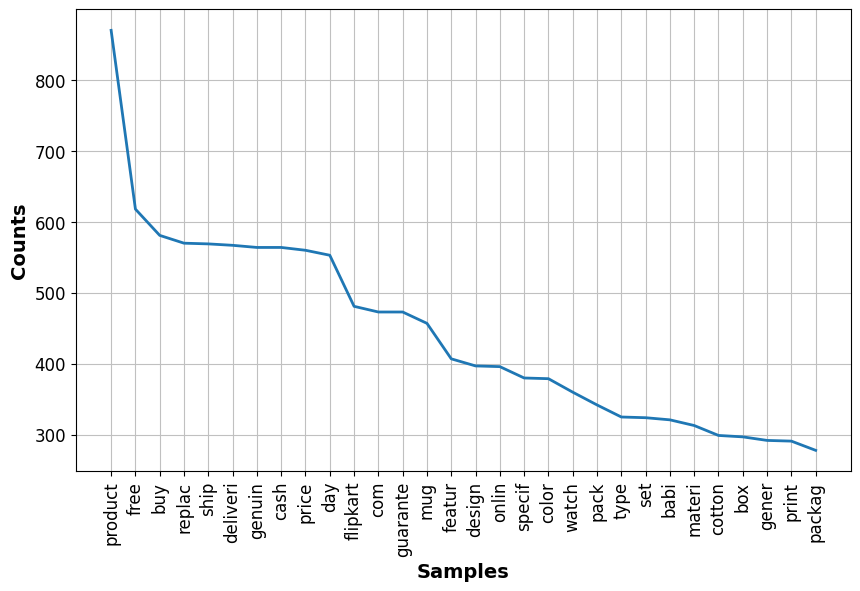

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function for visualization of word frequency
def visualize_word_frequency(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Create a frequency distribution of tokens
    freq_dist = nltk.FreqDist(tokens)
    # Plot the frequency distribution
    plt.figure(figsize=(10, 6))
    freq_dist.plot(30, cumulative=False)

# Visualize the word frequency distribution of the cleaned text
visualize_word_frequency(df_data['clean_description'].str.cat(sep=' '))

## I.2. Encodage de texte (Bag of Words, TF-IDF, BERT, USE ou DEBERTA)

In [16]:
# ==================================================================================================
# TEXT ENCODING - Bag of Words
# Bag of Words (BoW) is a simple yet effective method for encoding text data. It represents text 
# documents as numerical feature vectors by counting the frequency of each word in the document.
# ==================================================================================================
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the preprocessed text data
X_bow = count_vectorizer.fit_transform(df_data['clean_description'])

# Check the shape of the encoded data
print("Shape of encoded data (Bag of Words):", X_bow.shape)

Shape of encoded data (Bag of Words): (1049, 3915)


In [17]:
# ==================================================================================================
# TEXT ENCODING - Bag of Ngrams
# Bag of Ngram is a text encoding method that represents documents by counting the frequency 
# of consecutive pairs of words (bigrams) present in the text.
# ==================================================================================================
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with bigram range
count_vectorizer_Ngram = CountVectorizer(ngram_range=(2, 2))  # Using bigrams
X_bo2gram = count_vectorizer_Ngram.fit_transform(df_data['clean_description']) # Fit and transform the preprocessed text data

count_vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))  # Using trigrams
X_bo3gram = count_vectorizer_trigram.fit_transform(df_data['clean_description'])

count_vectorizer_fourgram = CountVectorizer(ngram_range=(4, 4))  # Using four-grams
X_bo4gram = count_vectorizer_fourgram.fit_transform(df_data['clean_description'])

# Check the shape of the encoded data
print("Shape of encoded data (Bigram Bag of Words):", X_bo2gram.shape)
print("Shape of encoded data (Trigram Bag of Words):", X_bo3gram.shape)
print("Shape of encoded data (Quadrigram Bag of Words):", X_bo4gram.shape)

Shape of encoded data (Bigram Bag of Words): (1049, 17493)
Shape of encoded data (Trigram Bag of Words): (1049, 22756)
Shape of encoded data (Quadrigram Bag of Words): (1049, 25227)


In [18]:
# ==================================================================================================
# TEXT ENCODING - TF-IDF (Term Frequency-Inverse Document Frequency).
# TF-IDF is another popular method for encoding text data, which takes into account not only the 
# frequency of words in a document but also their importance in the entire corpus.
# ==================================================================================================
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))

# Fit and transform the preprocessed text data
X_tfidf = tfidf_vectorizer.fit_transform(df_data['clean_description'])

# Check the shape of the encoded data
print("Shape of encoded data (TF-IDF):", X_tfidf.shape)

Shape of encoded data (TF-IDF): (1049, 3915)


In [19]:
# ==================================================================================================
# TEXT ENCODING - Wordl2Vec (CBOW)
# ==================================================================================================
from gensim.models import Word2Vec
import numpy as np


# Train Word2Vec model
sentences = [text.split() for text in df_data['clean_description']]
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)

# Map text data to Word2Vec embeddings
def text_to_vector(text):
    words = text.split()
    vectors = []
    for word in words:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)  # Return zeros if no word in vocabulary


X_word2vec_CBOW = np.vstack(df_data['clean_description'].apply(text_to_vector))
# Check the shape of the encoded data
print("Shape of encoded data (Word2Vec CBOW):", X_word2vec_CBOW.shape)

Shape of encoded data (Word2Vec CBOW): (1049, 100)


In [20]:
# ==================================================================================================
# TEXT ENCODING - Wordl2Vec (Skip-grams))
# ==================================================================================================
from gensim.models import Word2Vec

# Train Word2Vec model
sentences = [text.split() for text in df_data['clean_description']]
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=1)

# Map text data to Word2Vec embeddings
def text_to_vector(text):
    words = text.split()
    vectors = []
    for word in words:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)  # Return zeros if no word in vocabulary


X_word2vec_SKIPGRAMS = np.vstack(df_data['clean_description'].apply(text_to_vector))
print("Shape of encoded data (Word2Vec SKIP GRAMS):", X_word2vec_SKIPGRAMS.shape)

Shape of encoded data (Word2Vec SKIP GRAMS): (1049, 100)


In [21]:
# ==================================================================================================
# TEXT ENCODING - BERT
# ==================================================================================================
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode text
def encode_text(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract embeddings from BERT's output
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling over tokens
    return embeddings

# Apply encoding to the clean description column
df_data['bert_embeddings'] = df_data['clean_description'].apply(encode_text)
X_bert = np.vstack(df_data['bert_embeddings'])
print("Shape of encoded data (BERT):", X_bert.shape)

D:\ANACONDA\envs\OC_PROJECT8\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape of encoded data (BERT): (1049, 768)


In [22]:
# ==================================================================================================
# TEXT ENCODING - UNIVERSAL SENTENCE ENCODER (USE)
# ==================================================================================================
import tensorflow_hub as hub
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
import numpy as np

# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Encode text using Universal Sentence Encoder
def encode_text(text):
    embeddings = use_model([text])  # Pass text as a list
    return embeddings.numpy()

# Filter out empty strings and non-string values from the clean_description column
valid_texts = df_data['clean_description'].apply(lambda x: str(x).strip())  # Convert to string and remove leading/trailing whitespace
valid_texts = valid_texts[valid_texts != '']  # Filter out empty strings
valid_indices = valid_texts.index.tolist()  # Get indices of valid texts

# Apply encoding to the valid clean_description texts
df_data.loc[valid_indices, 'use_embeddings'] = valid_texts.apply(encode_text)
X_use = np.vstack(df_data.loc[valid_indices, 'use_embeddings'])
print("Shape of encoded data (UNIVERSAL SENTENCE ENCODER (USE)):", X_use.shape)

Shape of encoded data (UNIVERSAL SENTENCE ENCODER (USE)): (1049, 512)


In [23]:
# ==================================================================================================
# TEXT ENCODING - DEBERTA
# ==================================================================================================
from transformers import DebertaTokenizer, DebertaModel
import torch

# Load pre-trained DEBERTA model and tokenizer
tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
model = DebertaModel.from_pretrained('microsoft/deberta-base')

# Tokenize and encode text (similar structure)
def encode_text(text):
  inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
  with torch.no_grad():
    outputs = model(**inputs)
  # Extract embeddings using mean pooling over last hidden state
  last_hidden_state = outputs.last_hidden_state  # Access last hidden state
  embeddings = torch.mean(last_hidden_state, dim=1)  # Mean pooling over tokens (dim=1)
  return embeddings.cpu().numpy()  # Convert to numpy array

# Apply encoding to the clean description column
df_data['deberta_embeddings'] = df_data['clean_description'].apply(encode_text)
X_deberta = np.vstack(df_data['deberta_embeddings'])
print("Shape of encoded data (DEBERTA):", X_deberta.shape)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Shape of encoded data (DEBERTA): (1049, 768)


## I.3. TEXT DIMENSIONALITY REDUCTION USING DEBERTA

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import itertools

import shap
from IPython.display import display




# ==================================================================================================
# TEXT DIMENSIONALITY REDUCTION - PCA (Principal Component Analysis):
# Reducing the dimensionality of text features using PCA to visualize high-dimensional data in 2D.
# ==================================================================================================

# Create a t-SNE model with 2 components (for 2D visualization)
tsne = TSNE(n_components=2, random_state=42)

# Fit the t-SNE model to the text features
text_features_reduced = tsne.fit_transform(X_deberta)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_features_reduced, df_data['top_category'], test_size=0.2, random_state=42)

# Train a Random Forest classifier
# NOTE : BEST PARAMETER AFTER PARAMETER TUNING : Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# Best hyperparameters from your tuning process
best_params = {
    'criterion': 'entropy',
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}
random_forest_classifier = RandomForestClassifier(**best_params)
random_forest_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the classifier
accuracy = random_forest_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")



# ==================================================================================================
# GET SOME STATS ON THE CLUSTERS
# ==================================================================================================

# Get some statistics on the clusters
unique_labels, label_counts = np.unique(y_pred, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f'CLUSTER {label} contains {count} products')

# ==================================================================================================
# COMPUTE METRICS
# ==================================================================================================

# Compute the silhouette score
silhouette_avg = silhouette_score(X_test, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

# Compute the Davies-Bouldin index
davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

# Compare clusters with true categories using ARI
ari = adjusted_rand_score(y_test, y_pred)
print("Adjusted Rand Index:", ari)

# ==================================================================================================
# COMPUTE ACCURACY USING BEST MAPPING
# ==================================================================================================

best_accuracy = 0.0
best_mapping = {}

# Test various combinations of cluster_category_mapping
for label_combination in itertools.permutations(np.unique(y_pred)):
    mapping = {label: category for label, category in zip(np.unique(y_pred), label_combination)}
    predicted_labels = [mapping[label] for label in y_pred]
    accuracy = np.mean(y_test == predicted_labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = mapping

print("Best Mapping: ", best_mapping)
print("Best Accuracy:", best_accuracy)

Accuracy: 0.8285714285714286
CLUSTER Baby Care contains 33 products
CLUSTER Beauty and Personal Care contains 30 products
CLUSTER Computers contains 25 products
CLUSTER Home Decor & Festive Needs contains 36 products
CLUSTER Home Furnishing contains 32 products
CLUSTER Kitchen & Dining contains 20 products
CLUSTER Watches contains 34 products
Silhouette Score: 0.05588352680206299
Davies-Bouldin Index: 4.013300132303465
Adjusted Rand Index: 0.6502801916149108
Best Mapping:  {'Baby Care': 'Baby Care', 'Beauty and Personal Care': 'Beauty and Personal Care', 'Computers': 'Computers', 'Home Decor & Festive Needs': 'Home Decor & Festive Needs', 'Home Furnishing': 'Home Furnishing', 'Kitchen & Dining': 'Kitchen & Dining', 'Watches': 'Watches'}
Best Accuracy: 0.8285714285714286


In [25]:
# # ==================================================================================================
# # SHAP ANALYSIS - GLOBAL & LOCAL
# # ==================================================================================================
# explainer = shap.TreeExplainer(random_forest_classifier)
# shap_values = explainer.shap_values(X_deberta)

# shap.summary_plot(shap_values, X_deberta, plot_type='dot', feature_names=df_data.columns, plot_size ="auto")

# shap.initjs()
# instance_idx = 0
# df_X_deberta = pd.DataFrame(X_deberta)
# shap.force_plot(explainer.expected_value[instance_idx],X_deberta[instance_idx])


In [26]:
# # # ==================================================================================================
# # # SHAP ANALYSIS - GLOBAL & LOCAL
# # # ==================================================================================================
# X_train, X_test, y_train, y_test = train_test_split(X_deberta, df_data['top_category'], test_size=0.2, random_state=42)
# cls = RandomForestClassifier()
# cls.fit(X_train, y_train)

# explainer = shap.TreeExplainer(cls)
# shap_values = explainer.shap_values(X_deberta)

# class_names = df_data['top_category'].unique().tolist()
# shap.summary_plot(shap_values, X_deberta, plot_type='bar', class_names=class_names)

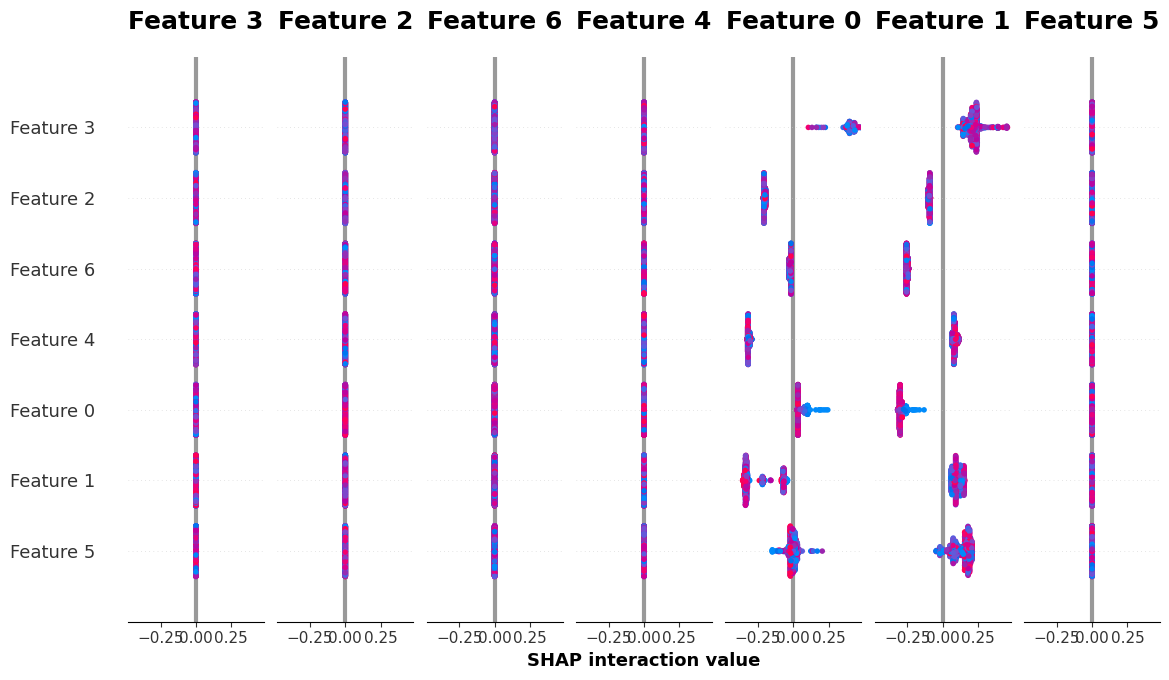

In [27]:
# # # ==================================================================================================
# # # SHAP ANALYSIS - GLOBAL
# # # ==================================================================================================

explainer = shap.TreeExplainer(random_forest_classifier)
shap_values = explainer.shap_values(X_deberta)
shap.summary_plot(shap_values, X_deberta, class_names=random_forest_classifier.classes_)


# # ==================================================================================================
# # SHAP ANALYSIS - LOCAL
# # ==================================================================================================
shap.initjs()
instance_idx = 0
df_X_deberta = pd.DataFrame(X_test)
shap.force_plot(explainer.expected_value[instance_idx],X_test[instance_idx])


C:\Users\Olivi\AppData\Local\Temp\ipykernel_196\1898611085.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


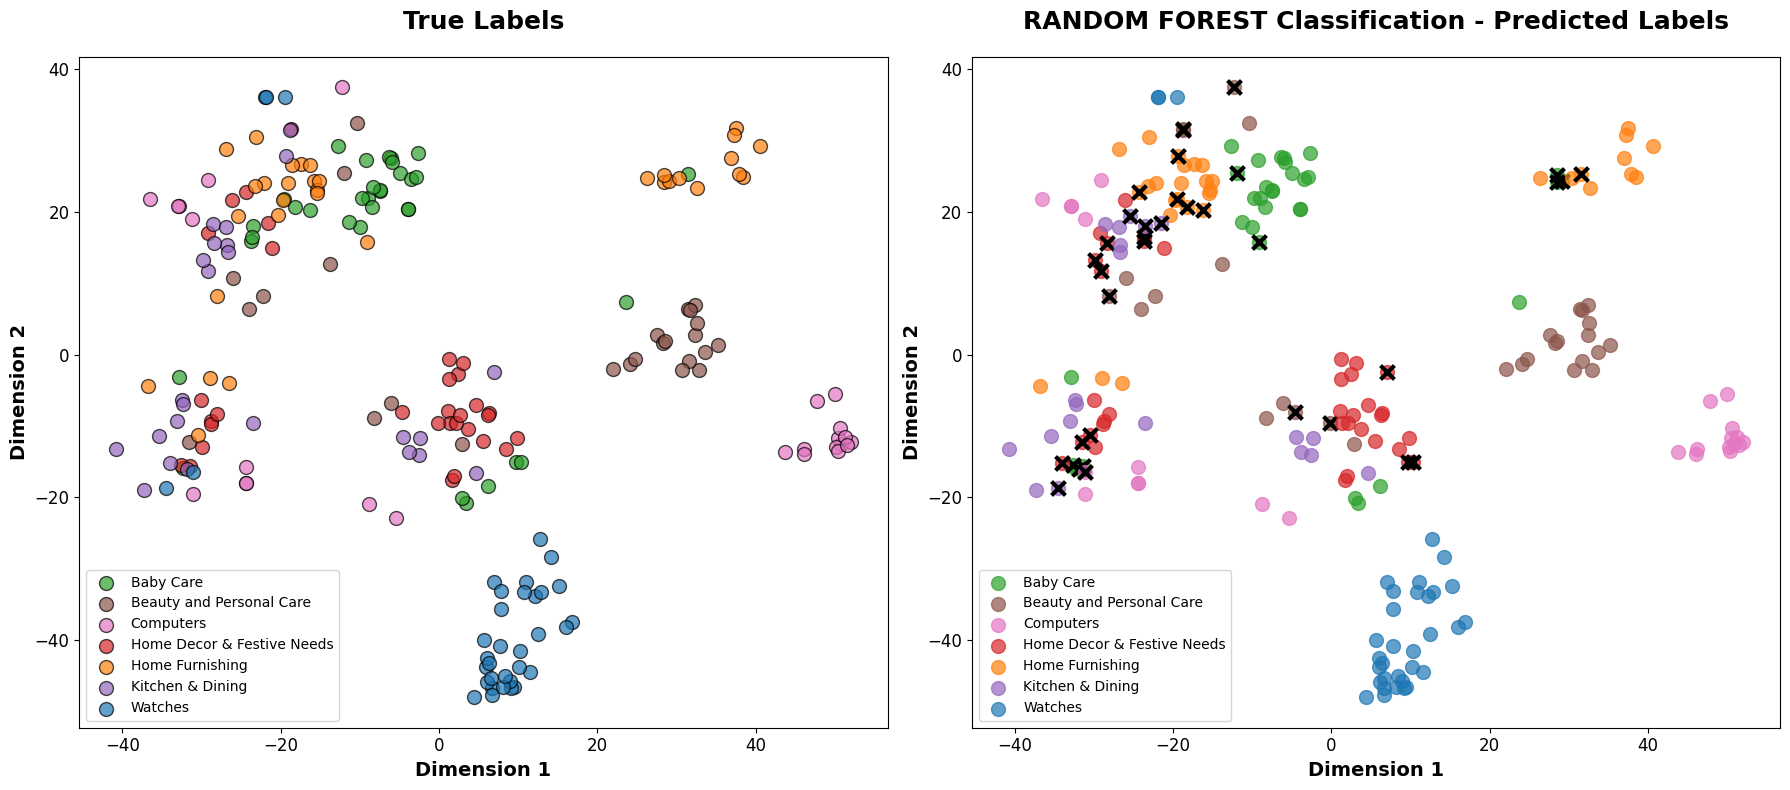

In [28]:
import matplotlib.pyplot as plt

# Define colors for each unique top category manually
top_category_color_dict = {
    'Home Furnishing': '#ff7f0e',              # Orange - #ff7f0e x
    'Baby Care': '#2ca02c',                    # Vert   - #2ca02c 
    'Watches': '#1f77b4',                      # Blue   - #1f77b4 
    'Home Decor & Festive Needs': '#d62728',   # Red    - #d62728 
    'Kitchen & Dining': '#9467bd',             # Purple - #9467bd x
    'Beauty and Personal Care': '#8c564b',     # Brown  - #8c564b
    'Computers': '#e377c2'                     # Pink   - #e377c2 
}

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Define colors for each unique true label
true_label_color_dict = top_category_color_dict

# Scatter plot for true labels
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    axes[0].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=true_label_color_dict[label], marker='o', edgecolors='black', alpha=0.7)

axes[0].set_title('True Labels')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend()

# Define colors for each unique predicted label
predicted_label_color_dict = top_category_color_dict

# Scatter plot for predicted labels
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    indices_mismatch = np.where((y_pred == label) & (y_pred != y_test))  # Filter for mismatched predictions
    axes[1].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=predicted_label_color_dict[label], alpha=0.7)
    axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches



axes[1].set_title('RANDOM FOREST Classification - Predicted Labels')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend()



plt.tight_layout()
plt.show()

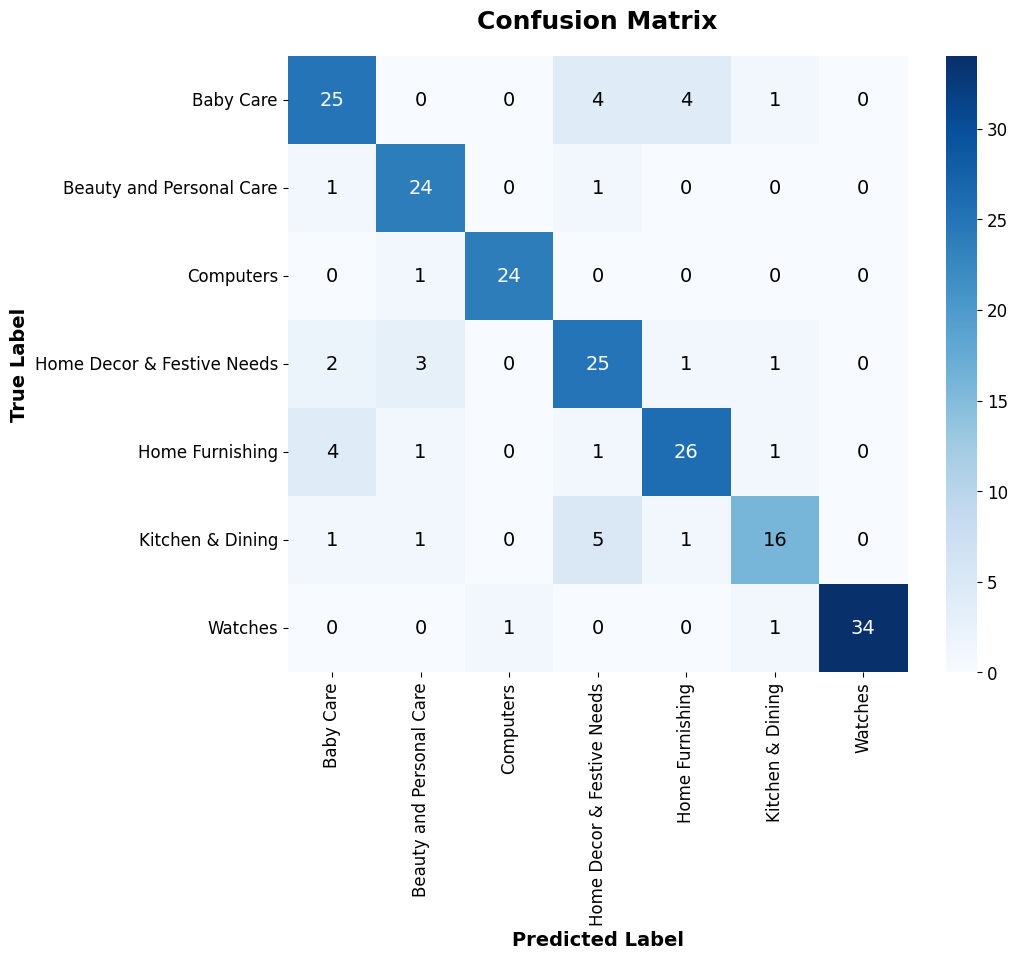

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_test))
# Add annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color=color, fontsize=14)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## COMPARISON BETWEEN METHOD/REPRESENTATION/CLASSIFIER + VISUALISATION

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier 
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC, SVC

In [31]:
# TEST

In [32]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import itertools


def compare_dimensionality_reduction(df, X, method, text_representation, type_category, ngram_range=(1, 1), classifier=RandomForestClassifier()):
    """
    Compare different dimensionality reduction methods and text representations using a chosen classifier.

    Parameters:
    - df: DataFrame containing the data.
    - X: Text features matrix (TF-IDF or Bag of Words).
    - method: Dimensionality reduction method ('PCA' or 't-SNE').
    - text_representation: Text representation ('TF-IDF', 'BOW', 'bigram', 'trigram', or 'quadrigram').
    - type_category : Type of category ('top_category', 'secondary_category', or 'tertiary_category').
    - ngram_range: Tuple specifying the range of n-grams to use (default is (1, 1) for unigrams (words)).
    - classifier: The classification model to use (default is RandomForestClassifier()).

    Returns:
    - Dictionary containing evaluation metrics for each case.
    """

    results = {}

    # ====================================================
    # DIMENSIONALITY REDUCTION METHODS
    # ====================================================
    # Initialize PCA or t-SNE based on the selected method
    if method == 'PCA':
        n_components = 2
        dimensionality_reducer = PCA(n_components=n_components, random_state=42)
    elif method == 't-SNE':
        n_components = 2
        dimensionality_reducer = TSNE(n_components=n_components, random_state=42, init="random")
    else:
        raise ValueError("Invalid method. Choose either 'PCA' or 't-SNE'.")

    # ====================================================
    # TEXT REPRESENTATIONS METHODS
    # ====================================================

    # Initialize CountVectorizer based on the text representation
    if text_representation == 'TF-IDF':
        vectorizer = TfidfVectorizer(ngram_range=ngram_range)
        X_text = vectorizer.fit_transform(df['clean_description'])
    elif text_representation == 'BOW':
        vectorizer = CountVectorizer(ngram_range=ngram_range)
        X_text = vectorizer.fit_transform(df['clean_description'])
    elif text_representation == 'Word2Vec_SKIPGRAMS':
        X_text = X_word2vec_SKIPGRAMS
    elif text_representation == 'Word2Vec_CBOW':
        X_text = X_word2vec_CBOW
    elif text_representation == 'BERT':
        X_text = X_bert
    elif text_representation == 'USE':
        X_text = X_use
    elif text_representation == 'DEBERTA':
        X_text = X_deberta
    else:
        raise ValueError("Invalid text_representation. Choose either 'TF-IDF' or 'BOW'.")

    # Concatenate text features with other features if necessary
    if isinstance(X, np.ndarray):
        # print(f'COMBINED - {method} - {text_representation} - {type_category} - {classifier}')
        print(f'COMBINED - {method:<7} - {text_representation:<18} - {type_category} - {classifier}')

        X_combined = X_text
    else:
        print('NO COMBINED')
        X_combined = X_text

    # Reduce dimensionality of combined features
    text_features_reduced = dimensionality_reducer.fit_transform(X_combined)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(text_features_reduced, df[type_category], test_size=0.2, random_state=42)

    # Train the chosen classifier
    classifier.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = classifier.predict(X_test)

    # Compute evaluation metrics
    accuracy = classifier.score(X_test, y_test)
    silhouette_avg = silhouette_score(X_test, y_pred)
    davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
    ari = adjusted_rand_score(y_test, y_pred)

    # Store results
    results['Accuracy'] = accuracy
    results['Silhouette Score'] = silhouette_avg
    results['Davies-Bouldin Index'] = davies_bouldin_idx
    results['Adjusted Rand Index'] = ari
    return results

# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=['Method', 'Representation', 'Type Category', 'Classifier Name', 'Silhouette Score', 'Davies-Bouldin Index', 'Adjusted Rand Index', 'Accuracy'])

# Function to call compare_dimensionality_reduction and append results to the DataFrame
def append_results(method, representation, type_category, classifierName, results):
    df_results.loc[len(df_results)] = [representation, method, type_category, classifierName, results['Silhouette Score'], results['Davies-Bouldin Index'], results['Adjusted Rand Index'], results['Accuracy']]

# ==================================================================================================
# GET RESULTS AND APPEND
# ==================================================================================================
type_categories = ['top_category', 'secondary_category', 'tertiary_category', 'product_category_tree']
type_categories = ['top_category']




classifiers = [
    ("SVM (LinearSVC)", LinearSVC()),  # Linear SVM for classification
    ("SVM (RBF)", SVC(kernel='rbf')),  # Add SVC with RBF kernel
    ("RANDOM FOREST", RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
  # ... (add more classifiers as needed)
]


for type_category in type_categories:
    for classifier_name, classifier_object in classifiers:

        #PCA + DEBERTA
        results_pca_DEBERTA = compare_dimensionality_reduction(df_data, X_deberta, 'PCA', 'DEBERTA', type_category, classifier= classifier_object)
        append_results('PCA', 'DEBERTA', type_category, classifier_name, results_pca_DEBERTA)
    
        # t-SNE + DEBERTA
        results_tsne_DEBERTA = compare_dimensionality_reduction(df_data, X_deberta, 't-SNE', 'DEBERTA', type_category, classifier= classifier_object)
        append_results('t-SNE', 'DEBERTA', type_category, classifier_name, results_tsne_DEBERTA)



        
        #PCA + X_Word2Vec_SKIPGRAMS
        results_pca_word2vec_SKIPGRAMS = compare_dimensionality_reduction(df_data, X_word2vec_SKIPGRAMS, 'PCA', 'Word2Vec_SKIPGRAMS', type_category, classifier= classifier_object)
        append_results('PCA', 'Word2Vec_SKIPGRAMS', type_category, classifier_name, results_pca_word2vec_SKIPGRAMS)
    
        # t-SNE + Word2Vec_SKIPGRAMS
        results_tsne_word2vec_SKIPGRAMS = compare_dimensionality_reduction(df_data, X_word2vec_SKIPGRAMS, 't-SNE', 'Word2Vec_SKIPGRAMS', type_category, classifier= classifier_object)
        append_results('t-SNE', 'Word2Vec_SKIPGRAMS', type_category, classifier_name, results_tsne_word2vec_SKIPGRAMS)
        
        #PCA + Word2Vec_CBOW
        results_pca_word2vec_CBOW = compare_dimensionality_reduction(df_data, X_word2vec_CBOW, 'PCA', 'Word2Vec_CBOW', type_category, classifier= classifier_object)
        append_results('PCA', 'Word2Vec_CBOW', type_category, classifier_name, results_pca_word2vec_CBOW)
    
        # t-SNE + Word2Vec_CBOW
        results_tsne_word2vec_CBOW = compare_dimensionality_reduction(df_data, X_word2vec_CBOW, 't-SNE', 'Word2Vec_CBOW', type_category, classifier= classifier_object)
        append_results('t-SNE', 'Word2Vec_CBOW', type_category, classifier_name, results_tsne_word2vec_CBOW)





        #PCA + BERT
        results_pca_BERT = compare_dimensionality_reduction(df_data, X_bert, 'PCA', 'BERT', type_category, classifier= classifier_object)
        append_results('PCA', 'BERT', type_category, classifier_name, results_pca_BERT)
    
        # t-SNE + BERT
        results_tsne_BERT = compare_dimensionality_reduction(df_data, X_bert, 't-SNE', 'BERT', type_category, classifier= classifier_object)
        append_results('t-SNE', 'BERT', type_category, classifier_name, results_tsne_BERT)
    
        #PCA + USE
        results_pca_USE = compare_dimensionality_reduction(df_data, X_use, 'PCA', 'USE', type_category, classifier= classifier_object)
        append_results('PCA', 'USE', type_category, classifier_name, results_pca_USE)
    
        # t-SNE + USE
        results_tsne_USE = compare_dimensionality_reduction(df_data, X_use, 't-SNE', 'USE', type_category, classifier= classifier_object)
        append_results('t-SNE', 'USE', type_category, classifier_name, results_tsne_USE)
    
    
        
        #PCA + TF-IDF
        results_pca_tfidf = compare_dimensionality_reduction(df_data, X_tfidf.toarray(), 'PCA', 'TF-IDF', type_category, classifier= classifier_object)
        append_results('PCA', 'TF-IDF', type_category, classifier_name, results_pca_tfidf)
    
        # t-SNE + TF-IDF
        results_tsne_tfidf = compare_dimensionality_reduction(df_data, X_tfidf.toarray(), 't-SNE', 'TF-IDF', type_category, classifier= classifier_object)
        append_results('t-SNE', 'TF-IDF', type_category, classifier_name, results_tsne_tfidf)
    
        # PCA + BOW
        results_pca_bow = compare_dimensionality_reduction(df_data, X_bow.toarray(), 'PCA', 'BOW', type_category, classifier= classifier_object)
        append_results('PCA', 'BOW', type_category, classifier_name, results_pca_bow)
    
        # t-SNE + BOW
        results_tsne_bow = compare_dimensionality_reduction(df_data, X_bow.toarray(), 't-SNE', 'BOW', type_category, classifier= classifier_object)
        append_results('t-SNE', 'BOW', type_category, classifier_name, results_tsne_bow)
    
        # PCA + BIGRAM
        results_pca_bow = compare_dimensionality_reduction(df_data, X_bo2gram.toarray(), 'PCA', 'BOW', type_category, (2,2), classifier= classifier_object)
        append_results('PCA', 'Bag of Bigram', type_category, classifier_name, results_pca_bow)
    
        # t-SNE + BIGRAM
        results_tsne_bow = compare_dimensionality_reduction(df_data, X_bo2gram.toarray(), 't-SNE', 'BOW', type_category, (2,2), classifier= classifier_object)
        append_results('t-SNE', 'Bag of Bigram', type_category, classifier_name, results_tsne_bow)
    
        # PCA + TRIGRAM
        results_pca_bow = compare_dimensionality_reduction(df_data, X_bo3gram.toarray(), 'PCA', 'BOW', type_category, (3,3), classifier= classifier_object)
        append_results('PCA', 'Bag of Trigram', type_category, classifier_name, results_pca_bow)
    
        # t-SNE + TRIGRAM
        results_tsne_bow = compare_dimensionality_reduction(df_data, X_bo3gram.toarray(), 't-SNE', 'BOW', type_category, (3,3), classifier= classifier_object)
        append_results('t-SNE', 'Bag of Trigram', type_category, classifier_name, results_tsne_bow)
    
        # PCA + QUADRIGRAM
        results_pca_bow = compare_dimensionality_reduction(df_data, X_bo4gram.toarray(), 'PCA', 'BOW', type_category, (4,4), classifier= classifier_object)
        append_results('PCA', 'Bag of Quadrigram', type_category, classifier_name, results_pca_bow)
    
        # t-SNE + QUADRIGRAM
        results_tsne_bow = compare_dimensionality_reduction(df_data, X_bo4gram.toarray(), 't-SNE', 'BOW', type_category, (4,4), classifier= classifier_object)
        append_results('t-SNE', 'Bag of Quadrigram', type_category, classifier_name, results_tsne_bow)

# Order the rows by Adjusted Rand Index in descending order
df_results = df_results.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
display(df_results)

# ==================================================================================================
# DO THE CHOICE BASED ON THE BEST ARI
# ==================================================================================================
# Find the row with the highest ARI
best_ari_row = df_results[df_results['Adjusted Rand Index'] == df_results['Adjusted Rand Index'].max()]

# Print the row with the best ARI
print("\n\nCHOICE :")
display(best_ari_row)

COMBINED - PCA     - DEBERTA            - top_category - LinearSVC()
COMBINED - t-SNE   - DEBERTA            - top_category - LinearSVC()
COMBINED - PCA     - Word2Vec_SKIPGRAMS - top_category - LinearSVC()
COMBINED - t-SNE   - Word2Vec_SKIPGRAMS - top_category - LinearSVC()
COMBINED - PCA     - Word2Vec_CBOW      - top_category - LinearSVC()
COMBINED - t-SNE   - Word2Vec_CBOW      - top_category - LinearSVC()
COMBINED - PCA     - BERT               - top_category - LinearSVC()
COMBINED - t-SNE   - BERT               - top_category - LinearSVC()
COMBINED - PCA     - USE                - top_category - LinearSVC()
COMBINED - t-SNE   - USE                - top_category - LinearSVC()
COMBINED - PCA     - TF-IDF             - top_category - LinearSVC()
COMBINED - t-SNE   - TF-IDF             - top_category - LinearSVC()
COMBINED - PCA     - BOW                - top_category - LinearSVC()
COMBINED - t-SNE   - BOW                - top_category - LinearSVC()
COMBINED - PCA     - BOW          

D:\ANACONDA\envs\OC_PROJECT8\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


COMBINED - PCA     - Word2Vec_SKIPGRAMS - top_category - LogisticRegression()
COMBINED - t-SNE   - Word2Vec_SKIPGRAMS - top_category - LogisticRegression()


D:\ANACONDA\envs\OC_PROJECT8\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


COMBINED - PCA     - Word2Vec_CBOW      - top_category - LogisticRegression()
COMBINED - t-SNE   - Word2Vec_CBOW      - top_category - LogisticRegression()
COMBINED - PCA     - BERT               - top_category - LogisticRegression()
COMBINED - t-SNE   - BERT               - top_category - LogisticRegression()


D:\ANACONDA\envs\OC_PROJECT8\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


COMBINED - PCA     - USE                - top_category - LogisticRegression()
COMBINED - t-SNE   - USE                - top_category - LogisticRegression()


D:\ANACONDA\envs\OC_PROJECT8\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


COMBINED - PCA     - TF-IDF             - top_category - LogisticRegression()
COMBINED - t-SNE   - TF-IDF             - top_category - LogisticRegression()


D:\ANACONDA\envs\OC_PROJECT8\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


COMBINED - PCA     - BOW                - top_category - LogisticRegression()
COMBINED - t-SNE   - BOW                - top_category - LogisticRegression()


D:\ANACONDA\envs\OC_PROJECT8\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


COMBINED - PCA     - BOW                - top_category - LogisticRegression()
COMBINED - t-SNE   - BOW                - top_category - LogisticRegression()
COMBINED - PCA     - BOW                - top_category - LogisticRegression()
COMBINED - t-SNE   - BOW                - top_category - LogisticRegression()
COMBINED - PCA     - BOW                - top_category - LogisticRegression()
COMBINED - t-SNE   - BOW                - top_category - LogisticRegression()
COMBINED - PCA     - DEBERTA            - top_category - KNeighborsClassifier()
COMBINED - t-SNE   - DEBERTA            - top_category - KNeighborsClassifier()
COMBINED - PCA     - Word2Vec_SKIPGRAMS - top_category - KNeighborsClassifier()
COMBINED - t-SNE   - Word2Vec_SKIPGRAMS - top_category - KNeighborsClassifier()
COMBINED - PCA     - Word2Vec_CBOW      - top_category - KNeighborsClassifier()
COMBINED - t-SNE   - Word2Vec_CBOW      - top_category - KNeighborsClassifier()
COMBINED - PCA     - BERT               - top_catego

,Method,Representation,Type Category,Classifier Name,Silhouette Score,Davies-Bouldin Index,Adjusted Rand Index,Accuracy
51,TF-IDF,t-SNE,top_category,RANDOM FOREST,0.22,1.90,0.83,0.92
53,BOW,t-SNE,top_category,RANDOM FOREST,0.24,2.36,0.80,0.91
49,USE,t-SNE,top_category,RANDOM FOREST,0.17,3.48,0.77,0.90
111,TF-IDF,t-SNE,top_category,KNN,0.22,1.97,0.76,0.89
71,TF-IDF,t-SNE,top_category,Decision Tree,0.19,2.47,0.76,0.89
...,...,...,...,...,...,...,...,...
80,DEBERTA,PCA,top_category,Logistic Regression,0.25,1.01,0.11,0.28
14,Bag of Bigram,PCA,top_category,SVM (LinearSVC),0.57,0.54,0.15,0.25
94,Bag of Bigram,PCA,top_category,Logistic Regression,0.35,0.76,0.20,0.25
16,Bag of Trigram,PCA,top_category,SVM (LinearSVC),0.19,0.73,0.10,0.23




CHOICE :


,Method,Representation,Type Category,Classifier Name,Silhouette Score,Davies-Bouldin Index,Adjusted Rand Index,Accuracy
51,TF-IDF,t-SNE,top_category,RANDOM FOREST,0.22,1.9,0.83,0.92


In [33]:
df_results["Method_Representation"] = df_results["Method"] + "_" + df_results["Representation"]
display(df_results.head(5))
display(df_results.columns)
df_results_copy = df_results

,Method,Representation,Type Category,Classifier Name,Silhouette Score,Davies-Bouldin Index,Adjusted Rand Index,Accuracy,Method_Representation
51,TF-IDF,t-SNE,top_category,RANDOM FOREST,0.22,1.90,0.83,0.92,TF-IDF_t-SNE
53,BOW,t-SNE,top_category,RANDOM FOREST,0.24,2.36,0.80,0.91,BOW_t-SNE
49,USE,t-SNE,top_category,RANDOM FOREST,0.17,3.48,0.77,0.90,USE_t-SNE
111,TF-IDF,t-SNE,top_category,KNN,0.22,1.97,0.76,0.89,TF-IDF_t-SNE
71,TF-IDF,t-SNE,top_category,Decision Tree,0.19,2.47,0.76,0.89,TF-IDF_t-SNE


Index(['Method', 'Representation', 'Type Category', 'Classifier Name',
       'Silhouette Score', 'Davies-Bouldin Index', 'Adjusted Rand Index',
       'Accuracy', 'Method_Representation'],
      dtype='object')

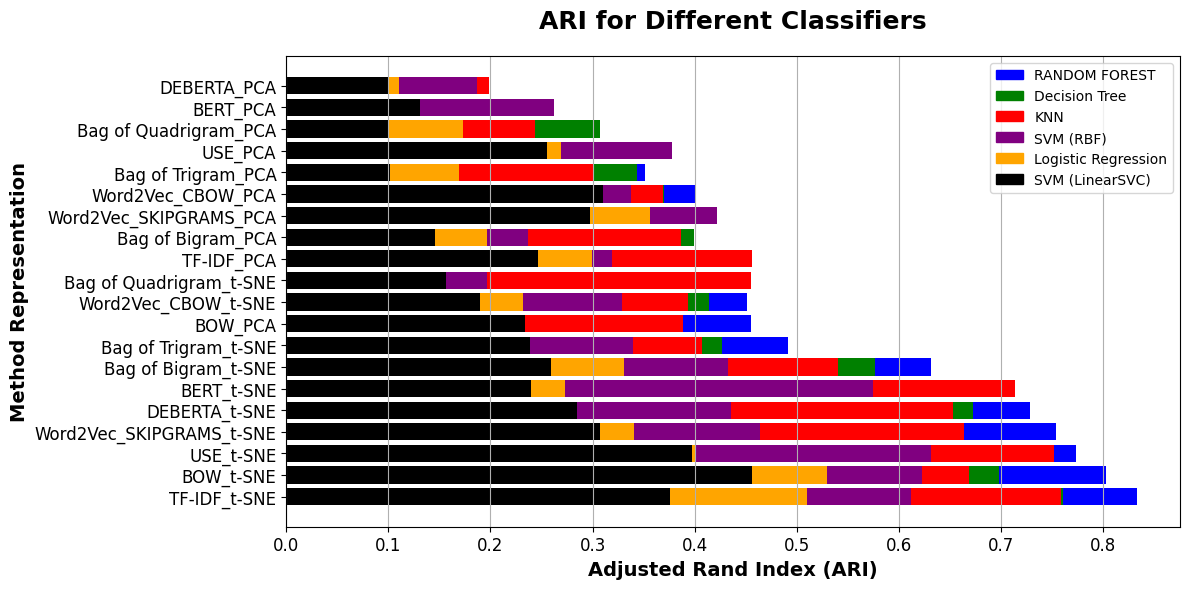

In [34]:
# Classifiers to analyze (updated)
classifiers = ["RANDOM FOREST", "Decision Tree", "KNN", "SVM (RBF)",
                "Logistic Regression", "SVM (LinearSVC)"]

# Define a color dictionary (update colors as needed)
classifier_colors = {
    'RANDOM FOREST': 'blue',
    'Decision Tree': 'green',
    'KNN': 'red',
    'SVM (RBF)': 'purple',
    'Logistic Regression': 'orange',
    'SVM (LinearSVC)': 'black'
}


# Initialize empty lists
method_representations = []
ari_values = []
colors = []

# Loop through classifiers
for classifier in classifiers:
  classifier_rows = df_results_copy[df_results_copy["Classifier Name"] == classifier]

  # Check for missing data
  if len(classifier_rows) == 0:
    print(f"No data found for {classifier} in the DataFrame.")
    continue  # Skip to the next classifier

  # Extract data and colors (only if data exists)
  method_representations.extend(classifier_rows["Method_Representation"].tolist())
  ari_values.extend(classifier_rows["Adjusted Rand Index"].tolist())  # Assuming single ARI per method
  colors.extend([classifier_colors[classifier]] * len(classifier_rows))  # Color based on current classifier

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.barh(method_representations, ari_values, color=colors)
plt.xlabel("Adjusted Rand Index (ARI)")
plt.ylabel("Method Representation")
plt.title("ARI for Different Classifiers")

# Manual legend creation
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=classifier_colors[c]) for c in classifiers]
legend_labels = classifiers
plt.legend(legend_handles, legend_labels)  # Custom legend

plt.yticks(rotation=0)  # Rotate y-axis labels for readability
plt.grid(axis="x")
plt.tight_layout()
plt.show()

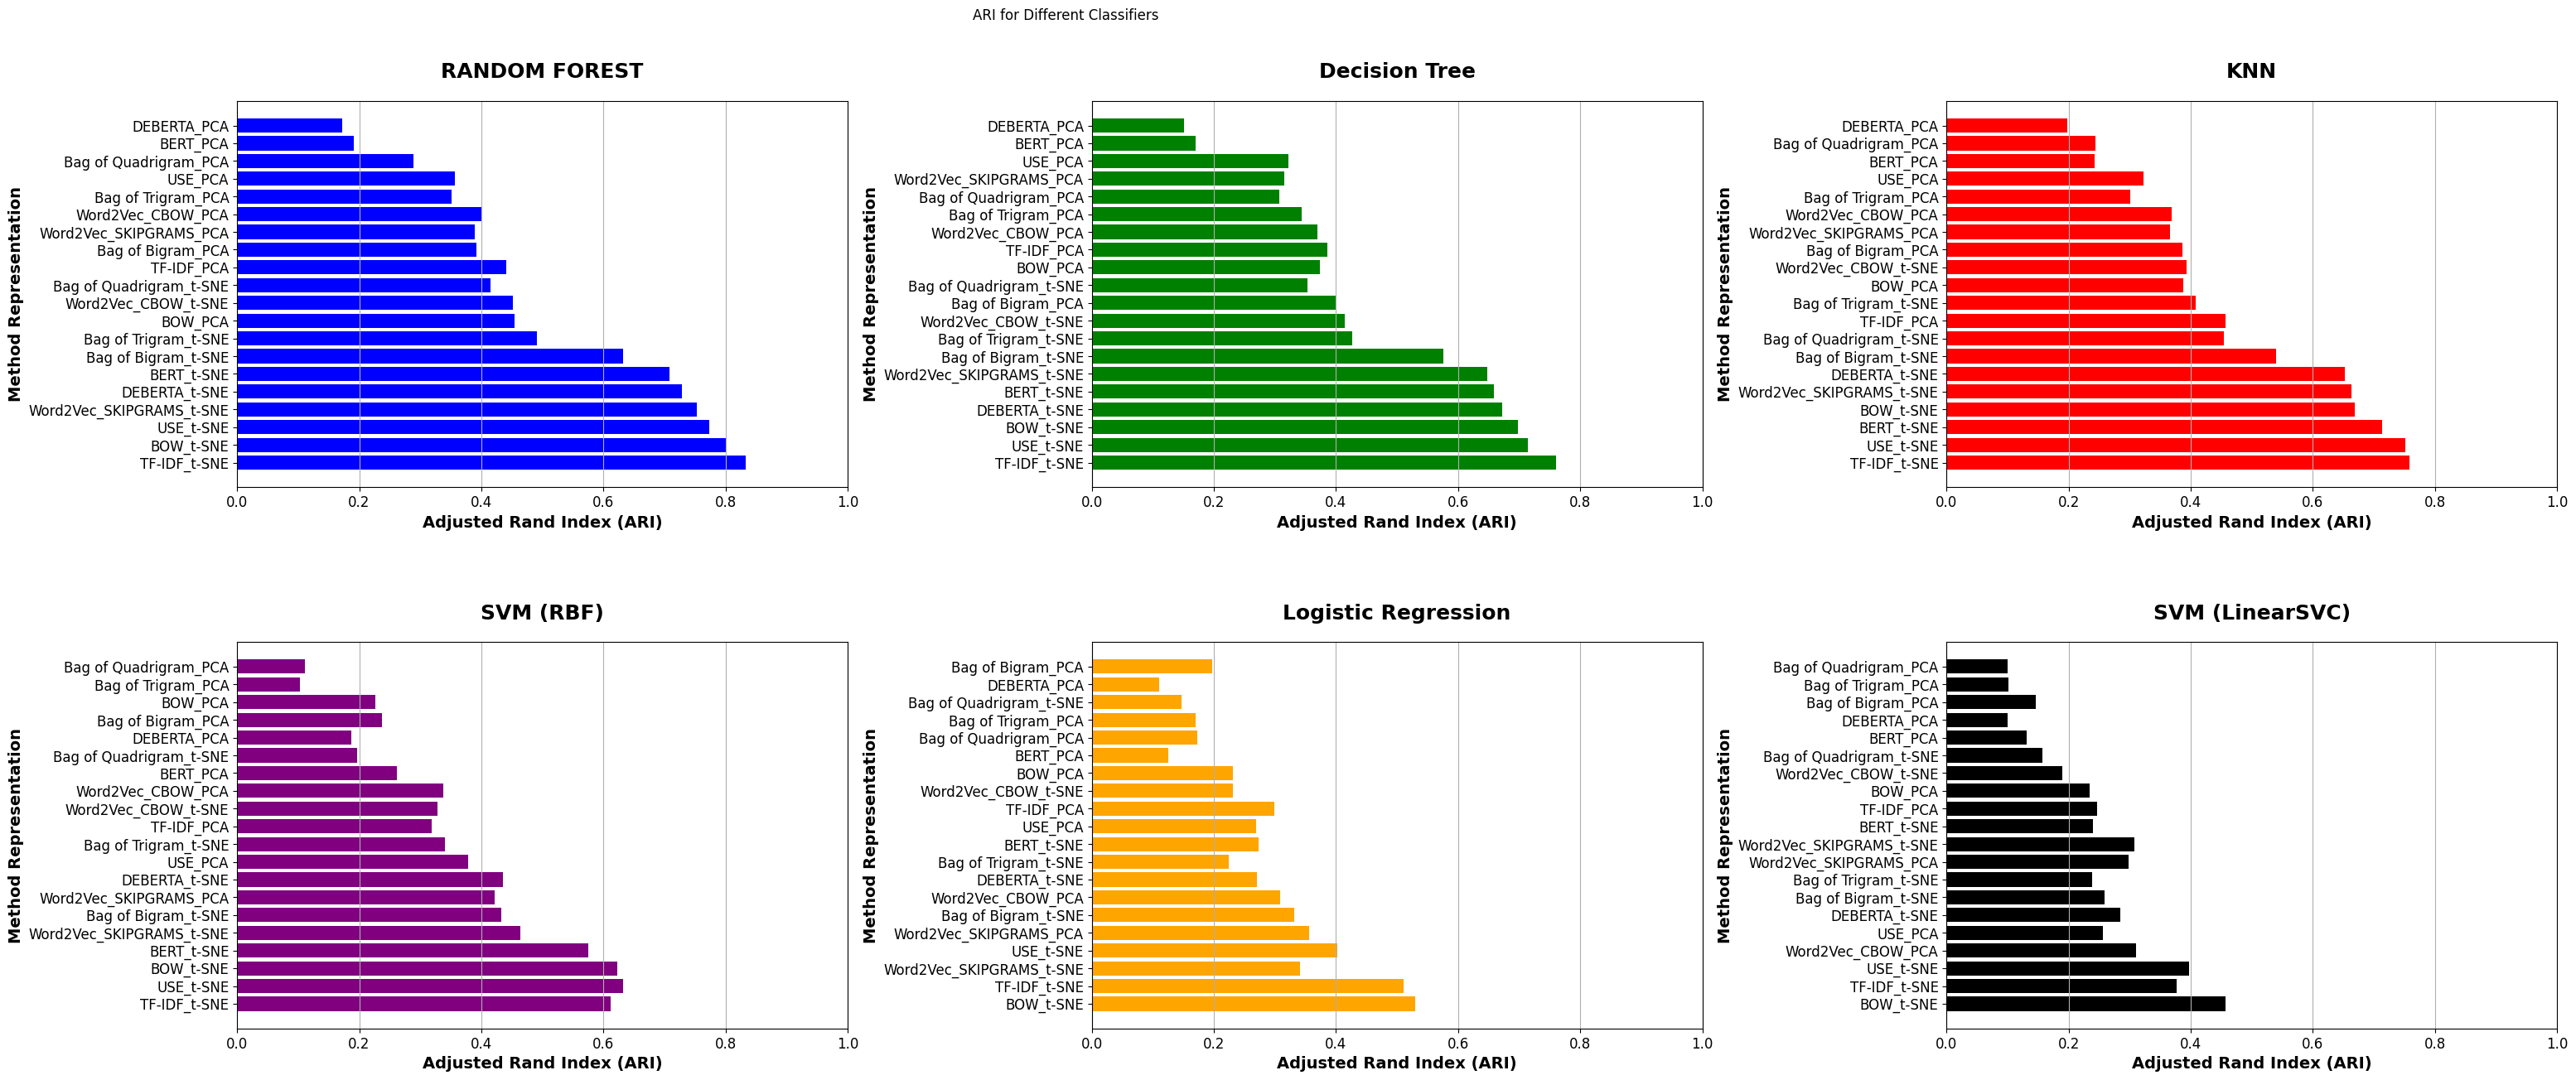

In [35]:
# Classifiers to analyze (updated)
classifiers = ["RANDOM FOREST", "Decision Tree", "KNN", "SVM (RBF)",
                "Logistic Regression", "SVM (LinearSVC)"]

# Define a color dictionary (update colors as needed)
classifier_colors = {
    'RANDOM FOREST': 'blue',
    'Decision Tree': 'green',
    'KNN': 'red',
    'SVM (RBF)': 'purple',
    'Logistic Regression': 'orange',
    'SVM (LinearSVC)': 'black'
}

# Initialize empty lists
method_representations = {}  # Dictionary for classifier-wise data
ari_values = {}

# Loop through classifiers
for classifier in classifiers:
    classifier_rows = df_results_copy[df_results_copy["Classifier Name"] == classifier]

    # Check for missing data
    if len(classifier_rows) == 0:
        print(f"No data found for {classifier} in the DataFrame.")
        continue  # Skip to the next classifier

    # Extract data (assuming single ARI per method per classifier)
    method_representations[classifier] = classifier_rows["Method_Representation"].tolist()
    ari_values[classifier] = classifier_rows["Adjusted Rand Index"].tolist()

# Define number of rows and columns for subplots (adjust as needed)
n_rows = 2
n_cols = 3

# Create the figure with subplots (disable y-axis sharing)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14), sharey=False)  # Adjust figsize for layout

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

# Loop through classifiers and corresponding subplots
for i, classifier in enumerate(classifiers):
    ax = axes_flat[i]  # Get current subplot

    # Check if data exists for the classifier
    if classifier in method_representations and classifier in ari_values:
        ax.barh(method_representations[classifier], ari_values[classifier], color=classifier_colors[classifier])
        ax.set_xlabel("Adjusted Rand Index (ARI)")
        ax.set_ylabel("Method Representation")  # Set y-label for each subplot
        ax.set_xlim(0, 1)  # Set the same x-axis range for all subplots (0 to max_ari)
        ax.set_title(classifier)
    else:
        ax.text(0.5, 0.5, f"No data for {classifier}", ha='center', va='center')

    # Adjust axes properties for readability (optional)
    ax.grid(axis="x")
    # Get existing y-tick positions (optional)
    # y_ticks = ax.get_yticks()
    # Rotate existing labels by 0 degrees (no rotation)
    # ax.set_yticks(y_ticks)

# Adjust spacing between subplots (optional)
plt.subplots_adjust(left=0, right=1.4, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

# Main plot title (optional)
fig.suptitle("ARI for Different Classifiers", fontsize=12)

# Show the plot
plt.show()

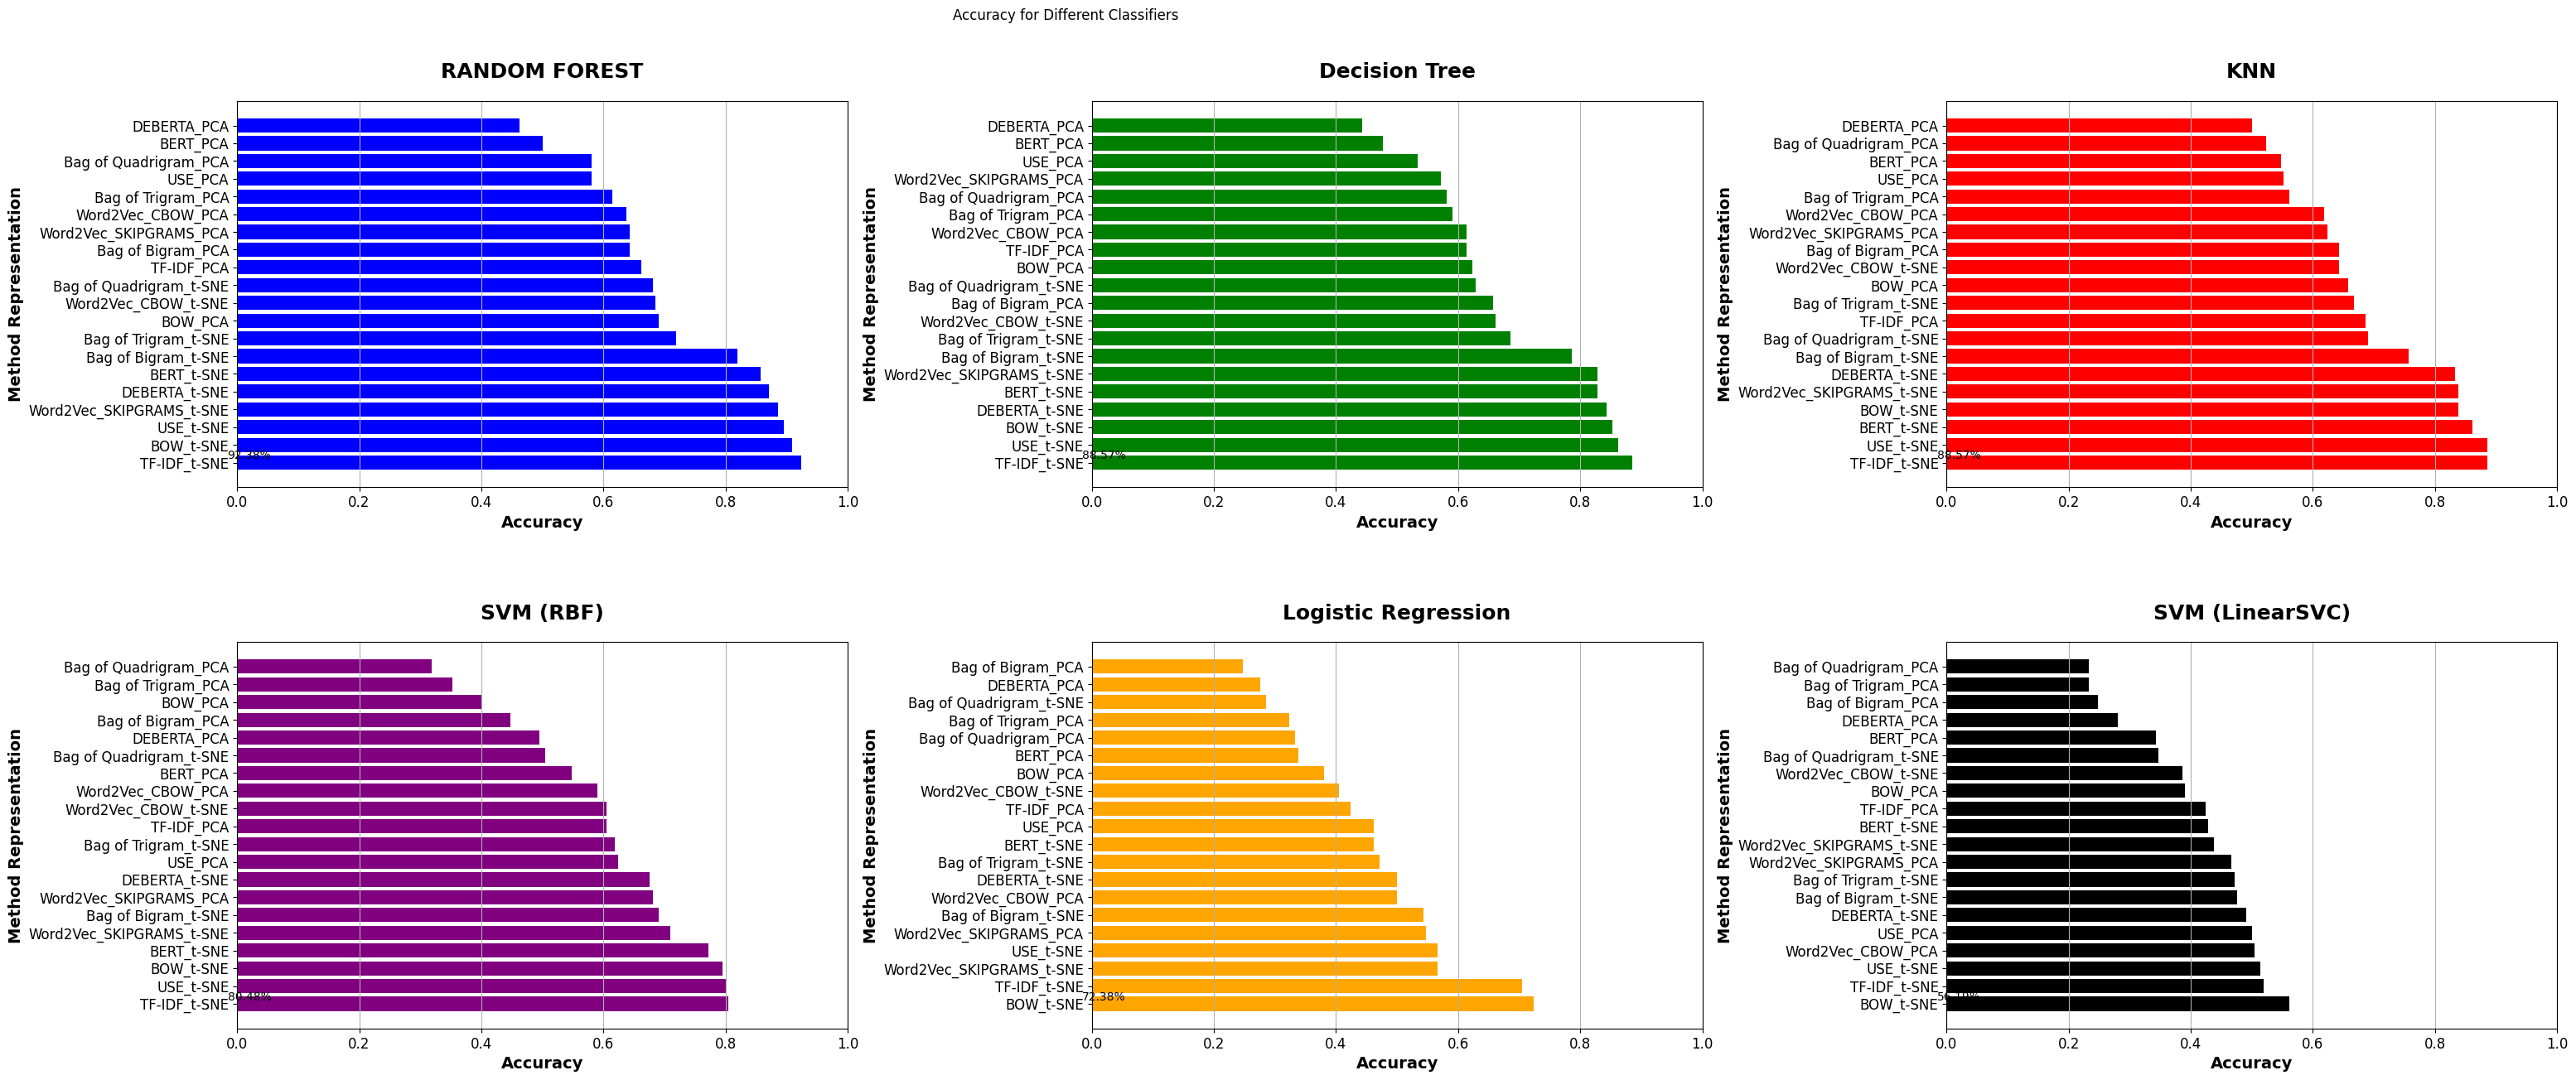

In [36]:
# Classifiers to analyze (updated)
classifiers = ["RANDOM FOREST", "Decision Tree", "KNN", "SVM (RBF)",
                "Logistic Regression", "SVM (LinearSVC)"]

# Define a color dictionary (update colors as needed)
classifier_colors = {
    'RANDOM FOREST': 'blue',
    'Decision Tree': 'green',
    'KNN': 'red',
    'SVM (RBF)': 'purple',
    'Logistic Regression': 'orange',
    'SVM (LinearSVC)': 'black'
}

# Initialize empty lists
method_representations = {}  # Dictionary for classifier-wise data
accuracy_values = {}

# Loop through classifiers (assuming 'Accuracy' column exists in df_results_copy)
for classifier in classifiers:
    classifier_rows = df_results_copy[df_results_copy["Classifier Name"] == classifier]

    # Check for missing data
    if len(classifier_rows) == 0:
        print(f"No data found for {classifier} in the DataFrame.")
        continue  # Skip to the next classifier

    # Extract data (assuming single accuracy per method per classifier)
    method_representations[classifier] = classifier_rows["Method_Representation"].tolist()
    accuracy_values[classifier] = classifier_rows["Accuracy"].tolist()  # Assuming 'Accuracy' column

# Define number of rows and columns for subplots (adjust as needed)
n_rows = 2
n_cols = 3

# Create the figure with subplots (disable y-axis sharing)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14), sharey=False)  # Adjust figsize for layout

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

# Loop through classifiers and corresponding subplots
for i, classifier in enumerate(classifiers):
    ax = axes_flat[i]  # Get current subplot

    # Check if data exists for the classifier
    if classifier in method_representations and classifier in accuracy_values:
        # Create horizontal bars with corresponding accuracy values
        bars = ax.barh(method_representations[classifier], accuracy_values[classifier], color=classifier_colors[classifier])

        # Get bar positions (anchor point for text)
        bar_positions = bars[0].get_xy()[0]  # Assuming single bar per method

        # Check if bar_positions is iterable (list or NumPy array)
        if isinstance(bar_positions, (list, np.ndarray)):
            # Iterate through multiple bar positions
            for bar_position, accuracy_value in zip(bar_positions, accuracy_values[classifier]):
                ax.text(bar_position + 0.02,  # Offset to the right of bars
                        bar_position + bars[0].get_height() / 2,  # Center of bar height
                        f"{accuracy_value:.2%}",  # Format accuracy as percentage with 2 decimal places
                        va='center')  # Vertical alignment
        else:
            # Handle single bar case (assuming bar_positions is an integer)
            ax.text(bar_positions + 0.02,  # Offset to the right of the bar
                    bar_positions + bars[0].get_height() / 2,  # Center the text vertically
                    f"{accuracy_values[classifier][0]:.2%}",  # Access accuracy for single bar
                    va='center', ha='center')  # Center the text horizontally

        ax.set_xlabel("Accuracy")
        ax.set_ylabel("Method Representation")  # Set y-label for each subplot
        ax.set_xlim(0, 1)  # Set the same x-axis range for all subplots (0 to 1)
        ax.set_title(classifier)
    else:
        ax.text(0.5, 0.5, f"No data for {classifier}", ha='center', va='center')

    # Adjust axes properties for readability (optional)
    ax.grid(axis="x")

# Adjust spacing between subplots (optional)
plt.subplots_adjust(left=0, right=1.4, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)


# Main plot title (optional)
fig.suptitle("Accuracy for Different Classifiers", fontsize=12)

# Show the plot
plt.show()

In [37]:
df_results_copy.to_csv("df_results_copy.csv", index=False)

In [38]:
# ==================================================================================================
# CREATE df_merged for ARI 
# ==================================================================================================
# Select all rows for the classifier 'RANDOM FOREST'
df_RANDOM_FOREST       = df_results[df_results['Classifier Name'] == 'RANDOM FOREST']
df_Decision_Tree       = df_results[df_results['Classifier Name'] == 'Decision Tree']
df_KNN                 = df_results[df_results['Classifier Name'] == 'KNN']
df_SVM_RBF             = df_results[df_results['Classifier Name'] == 'SVM (RBF)']
df_Logistic_Regression = df_results[df_results['Classifier Name'] == 'Logistic Regression']
df_SVM_linear          = df_results[df_results['Classifier Name'] == 'SVM (LinearSVC)']


# 1
df_merged = df_RANDOM_FOREST[['Method_Representation', 'Adjusted Rand Index']]
df_merged.columns = ['Method_Representation', 'ARI_RANDOM_FOREST']

# 2
df_merged = df_merged.merge(df_Decision_Tree[['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_DECISION_TREE'}, inplace=True)
# 3
df_merged = df_merged.merge(df_KNN[['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_KNN'}, inplace=True)
# 4
df_merged = df_merged.merge(df_SVM_RBF[['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_SVM_RBF'}, inplace=True)
# 5
df_merged = df_merged.merge(df_Logistic_Regression[['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_Logistic_Regression'}, inplace=True)
# 6
df_merged = df_merged.merge(df_SVM_linear [['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_SVM_linear'}, inplace=True)


df_merged = df_merged.sort_values(by='ARI_RANDOM_FOREST', ascending=True)
display(df_merged)

,Method_Representation,ARI_RANDOM_FOREST,ARI_DECISION_TREE,ARI_KNN,ARI_SVM_RBF,ARI_Logistic_Regression,ARI_SVM_linear
10,DEBERTA_PCA,0.17,0.15,0.20,0.19,0.11,0.10
0,BERT_PCA,0.19,0.17,0.24,0.26,0.12,0.13
6,Bag of Quadrigram_PCA,0.29,0.31,0.24,0.11,0.17,0.10
8,Bag of Trigram_PCA,0.35,0.34,0.30,0.10,0.17,0.10
14,USE_PCA,0.36,0.32,0.32,0.38,0.27,0.26
18,Word2Vec_SKIPGRAMS_PCA,0.39,0.31,0.37,0.42,0.36,0.30
4,Bag of Bigram_PCA,0.39,0.40,0.39,0.24,0.20,0.15
16,Word2Vec_CBOW_PCA,0.40,0.37,0.37,0.34,0.31,0.31
7,Bag of Quadrigram_t-SNE,0.42,0.35,0.45,0.20,0.15,0.16
12,TF-IDF_PCA,0.44,0.39,0.46,0.32,0.30,0.25


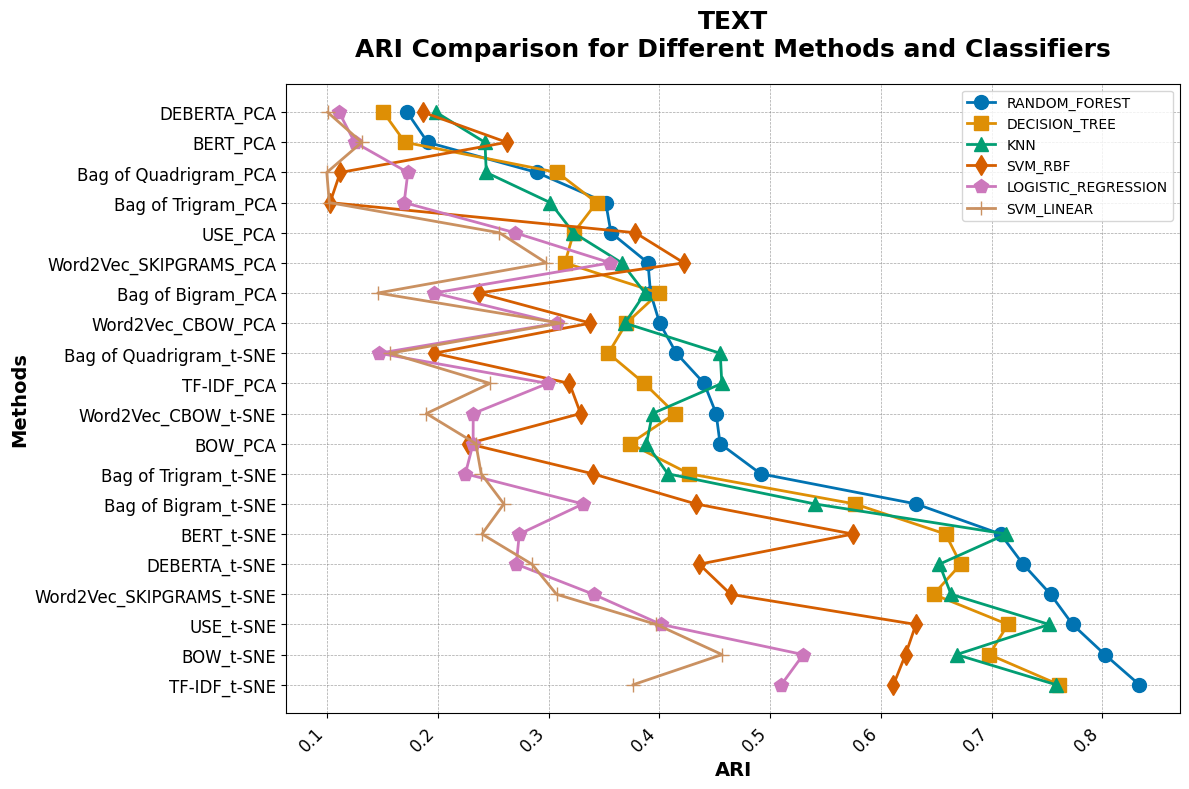

In [39]:
# ==================================================================================================
# PLOT ARI
# ==================================================================================================
# Set the figure size
plt.figure(figsize=(12, 8))
palette = sns.color_palette("colorblind")
# Plot the lines with markers, but with reversed x and y axes
plt.plot(df_merged['ARI_RANDOM_FOREST']      , df_merged['Method_Representation'], marker='o', color=palette[0], label='RANDOM_FOREST', linewidth=2)
plt.plot(df_merged['ARI_DECISION_TREE']      , df_merged['Method_Representation'], marker='s', color=palette[1], label='DECISION_TREE', linewidth=2)
plt.plot(df_merged['ARI_KNN']                , df_merged['Method_Representation'], marker='^', color=palette[2], label='KNN', linewidth=2)
plt.plot(df_merged['ARI_SVM_RBF']            , df_merged['Method_Representation'], marker='d', color=palette[3], label='SVM_RBF', linewidth=2)
plt.plot(df_merged['ARI_Logistic_Regression'], df_merged['Method_Representation'], marker='p', color=palette[4], label='LOGISTIC_REGRESSION', linewidth=2)
plt.plot(df_merged['ARI_SVM_linear']         , df_merged['Method_Representation'], marker='+', color=palette[5], label='SVM_LINEAR', linewidth=2)


# Add labels and title
plt.xlabel('ARI')
plt.ylabel('Methods')
plt.title('TEXT\nARI Comparison for Different Methods and Classifiers')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Invert the y-axis to reverse the order of models
plt.gca().invert_yaxis()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [40]:
# ==================================================================================================
# CREATE df_merged for ACCURACY
# ==================================================================================================
# Select all rows for the classifier 'RANDOM FOREST'
df_RANDOM_FOREST       = df_results[df_results['Classifier Name'] == 'RANDOM FOREST']
df_Decision_Tree       = df_results[df_results['Classifier Name'] == 'Decision Tree']
df_KNN                 = df_results[df_results['Classifier Name'] == 'KNN']
df_SVM_RBF             = df_results[df_results['Classifier Name'] == 'SVM (RBF)']
df_Logistic_Regression = df_results[df_results['Classifier Name'] == 'Logistic Regression']
df_SVM_linear          = df_results[df_results['Classifier Name'] == 'SVM (LinearSVC)']


# 1
df_merged_accuracy = df_RANDOM_FOREST[['Method_Representation', 'Accuracy']]
df_merged_accuracy.columns = ['Method_Representation', 'ACCURACY_RANDOM_FOREST']

# 2
df_merged_accuracy = df_merged_accuracy.merge(df_Decision_Tree[['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_DECISION_TREE'}, inplace=True)
# 3
df_merged_accuracy = df_merged_accuracy.merge(df_KNN[['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_KNN'}, inplace=True)
# 4
df_merged_accuracy = df_merged_accuracy.merge(df_SVM_RBF[['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_SVM_RBF'}, inplace=True)
# 5
df_merged_accuracy = df_merged_accuracy.merge(df_Logistic_Regression[['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_Logistic_Regression'}, inplace=True)
# 6
df_merged_accuracy = df_merged_accuracy.merge(df_SVM_linear [['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_SVM_linear'}, inplace=True)


df_merged_accuracy = df_merged_accuracy.sort_values(by='ACCURACY_RANDOM_FOREST', ascending=True)
display(df_merged_accuracy)

,Method_Representation,ACCURACY_RANDOM_FOREST,ACCURACY_DECISION_TREE,ACCURACY_KNN,ACCURACY_SVM_RBF,ACCURACY_Logistic_Regression,ACCURACY_SVM_linear
10,DEBERTA_PCA,0.46,0.44,0.50,0.50,0.28,0.28
0,BERT_PCA,0.50,0.48,0.55,0.55,0.34,0.34
14,USE_PCA,0.58,0.53,0.55,0.62,0.46,0.50
6,Bag of Quadrigram_PCA,0.58,0.58,0.52,0.32,0.33,0.23
8,Bag of Trigram_PCA,0.61,0.59,0.56,0.35,0.32,0.23
16,Word2Vec_CBOW_PCA,0.64,0.61,0.62,0.59,0.50,0.50
4,Bag of Bigram_PCA,0.64,0.66,0.64,0.45,0.25,0.25
18,Word2Vec_SKIPGRAMS_PCA,0.64,0.57,0.62,0.68,0.55,0.47
12,TF-IDF_PCA,0.66,0.61,0.69,0.60,0.42,0.42
7,Bag of Quadrigram_t-SNE,0.68,0.63,0.69,0.50,0.29,0.35


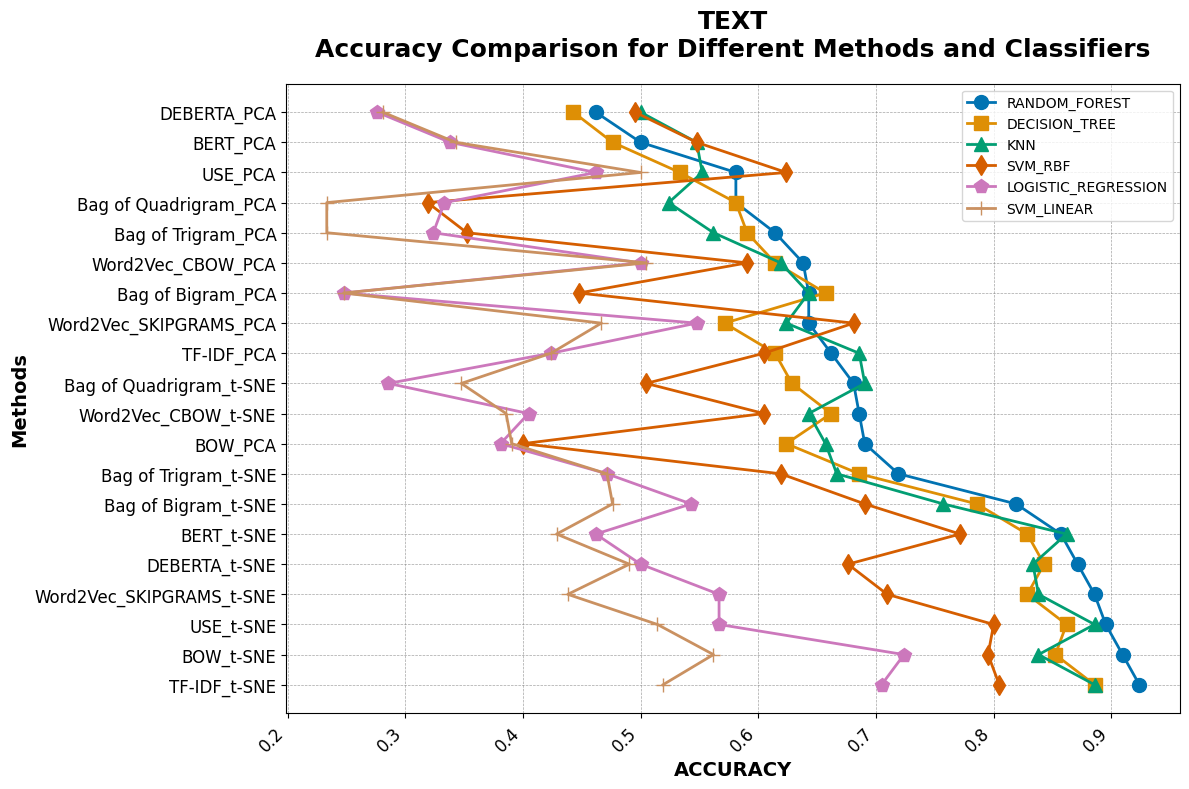

In [41]:
# ==================================================================================================
# PLOT ACCURACY
# ==================================================================================================
# Set the figure size
plt.figure(figsize=(12, 8))
palette = sns.color_palette("colorblind")
# Plot the lines with markers, but with reversed x and y axes
plt.plot(df_merged_accuracy['ACCURACY_RANDOM_FOREST']      , df_merged_accuracy['Method_Representation'], marker='o', color=palette[0], label='RANDOM_FOREST', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_DECISION_TREE']      , df_merged_accuracy['Method_Representation'], marker='s', color=palette[1], label='DECISION_TREE', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_KNN']                , df_merged_accuracy['Method_Representation'], marker='^', color=palette[2], label='KNN', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_SVM_RBF']            , df_merged_accuracy['Method_Representation'], marker='d', color=palette[3], label='SVM_RBF', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_Logistic_Regression'], df_merged_accuracy['Method_Representation'], marker='p', color=palette[4], label='LOGISTIC_REGRESSION', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_SVM_linear']         , df_merged_accuracy['Method_Representation'], marker='+', color=palette[5], label='SVM_LINEAR', linewidth=2)


# Add labels and title
plt.xlabel('ACCURACY')
plt.ylabel('Methods')
plt.title('TEXT\nAccuracy Comparison for Different Methods and Classifiers')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Invert the y-axis to reverse the order of models
plt.gca().invert_yaxis()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()